In [93]:
#Look at the spectrum of the the eigenvalues for the ordered case

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

In [114]:
time=np.arange(0,6000,5)

In [101]:
#Analytical Method
class tight_binding_model():
    def __init__(self,gamma):
        self.gamma=gamma
        self.lattice_size=len(gamma)
        self.H=self.hamiltonian(gamma)
        self.Lambda,self.w=np.linalg.eigh(self.H)
    def hamiltonian(self,gamma):
        H=np.diagflat(gamma[1:],1)+np.diagflat(gamma[1:],-1)
        H[self.lattice_size-1,0]=gamma[0]
        H[0,self.lattice_size-1]=gamma[0]
        return H
    def return_amplitude(self,t):
        Lambda=self.Lambda*t
        w=self.w[0]
        Lambda=np.exp(1j*Lambda,dtype=np.complex_)
        u=Lambda*w@w
        return u
    def echo(self,times):
        amplitude=[]
        for t in times:
            amplitude.append(self.return_amplitude(t))
        return np.abs(np.array(amplitude,dtype=np.complex_))**2
    def phi(self,amplitude):
        n=len(amplitude)
        phi=np.zeros(n,dtype=np.complex_)
        phi[0]=amplitude[0]
        for i in range(1,n):
            inverse=amplitude[:i][::-1]
            phi[i]=amplitude[i]-phi[:i]@inverse
        return phi
    def F_n(self,time_array):
        amplitude=[]
        for t in time_array:
            amplitude.append(self.return_amplitude(t))
        F=self.phi(amplitude)
        return np.abs(np.array(F))**2

In [115]:
#Analytical method 
lattice_size=6000
gamma=np.ones(lattice_size)
tb=tight_binding_model(gamma)

1.0


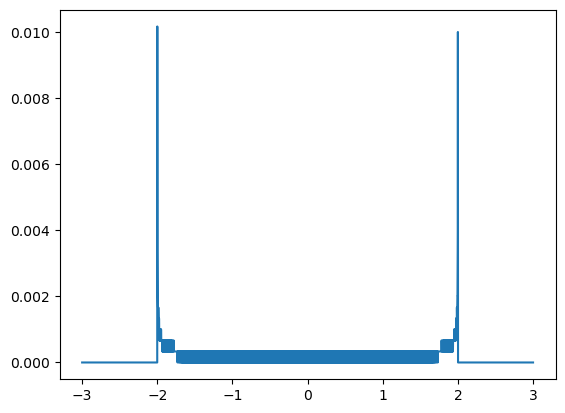

In [116]:
#Density of states
rho_E,E=np.histogram(tb.Lambda,bins=6000,range=(-3,3))
rho_E=rho_E/np.sum(rho_E)
E=E[:-1]
plt.plot(E,rho_E)
print(rho_E.sum())

In [125]:
#Density of states integral
def loschmidt(E,rho_E,t):
    return np.exp(-1j*t*E)*rho_E
echo=[]
for t in time:
    echo_t=0
    for i in range(len(rho_E)):
        echo_t+=loschmidt(E[i],rho_E[i],t)
    echo.append(echo_t)
echo=np.array(echo,dtype=complex)**2

In [123]:
#Error plots
L=tb.echo(time)
exact=jv(0,2*time)**2
analytical_error=np.abs(exact-L)**2
density_error=np.abs(exact-echo)**2

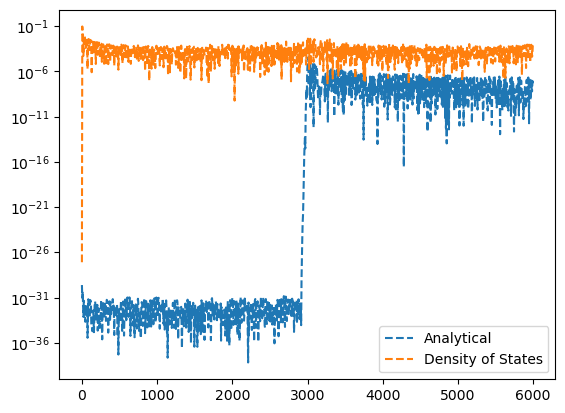

In [124]:
plt.plot(time,analytical_error,'--',label='Analytical')
plt.plot(time,density_error,'--',label='Density of States')
plt.legend()
plt.yscale('log')

In [2]:
#Energy integral
from scipy.integrate import quad
from scipy.integrate import quadrature
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
def f(y,t):         #Using the bessel function representation
    return np.exp(-2j*np.cos(y)*t)/(2*np.pi)
def g(E,t):         #Using the density of states
    A=2*np.pi
    return np.exp(-1j*E*t)/(A*np.sqrt(4-E**2,dtype=np.complex_))
#Integration
#Using the bessel function representation
def integral_bessel(t):
    return quad(f,0,2*np.pi,args=(t),complex_func=True)[0]
#Using the density of states
def integral_dos(t):
    return quad(g,-2,2,args=(t),complex_func=True)[0]

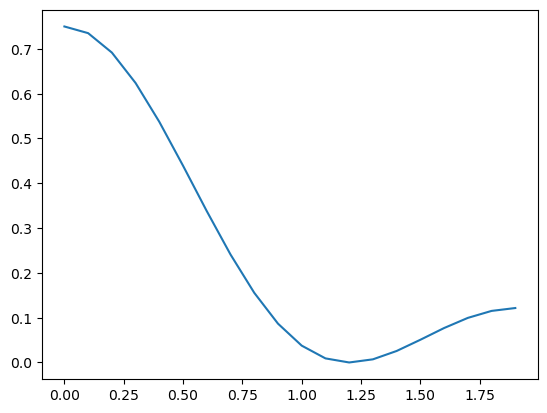

In [3]:
integral=[]
time=np.arange(0,2,0.1)
exact=jv(0,2*time)**2
for t in time:
    integral.append(integral_dos(t))
integral=np.abs(np.array(integral,dtype=np.complex_))**2
error=np.abs(exact-integral)
plt.plot(time,error,label='Density of States')

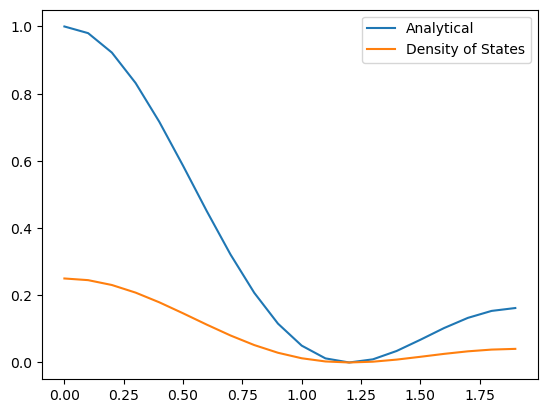

In [4]:
plt.plot(time,exact,label='Analytical')
plt.plot(time,integral,label='Density of States')
plt.legend()

In [1]:
#Anderson Model
class anderson():
    def __init__(self,energy):
        self.energy=energy
        self.lattice_size=len(energy)
        self.H=self.hamiltonian(energy)
        self.Lambda,self.w=np.linalg.eigh(self.H)
    def hamiltonian(self,energy):
        I=np.ones(self.lattice_size-1)
        H=np.diagflat(I,1)+np.diagflat(I,-1)+np.diagflat(energy)
        H[self.lattice_size-1,0]=1
        H[0,self.lattice_size-1]=1
        return H
    def return_amplitude(self,t):
        Lambda=self.Lambda*t
        w=self.w[0]
        Lambda=np.exp(-1j*Lambda,dtype=np.complex_)
        u=Lambda*w@w
        return u
    def echo(self,times):
        amplitude=[]
        for t in times:
            amplitude.append(self.return_amplitude(t))
        return np.abs(np.array(amplitude,dtype=np.complex_))**2
    def phi(self,amplitude):
        n=len(amplitude)
        phi=np.zeros(n,dtype=np.complex_)
        phi[0]=amplitude[0]
        for i in range(1,n):
            inverse=amplitude[:i][::-1]
            phi[i]=amplitude[i]-phi[:i]@inverse
        return phi
    def F_n(self,time_array):
        amplitude=[]
        for t in time_array:
            amplitude.append(self.return_amplitude(t))
        F=self.phi(amplitude)
        return np.abs(np.array(F))**2

In [108]:
W=1
L=1000
Energy=np.random.uniform(low=-W/2, high=W/2, size=(L))
anderson_model=anderson(Energy)
energy=anderson_model.Lambda
time=np.arange(0,20,0.01)

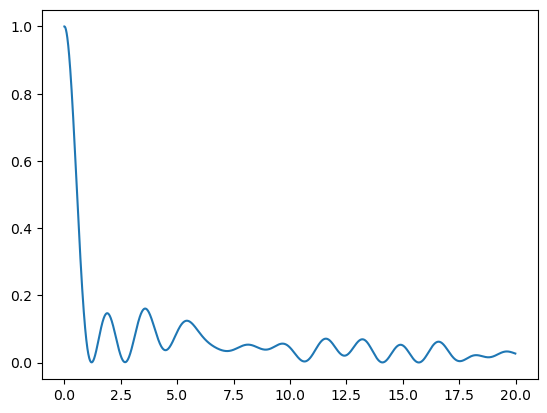

In [112]:
energy=anderson_model.Lambda
time=np.arange(0,20,0.01)
plt.plot(time,anderson_model.echo(time))

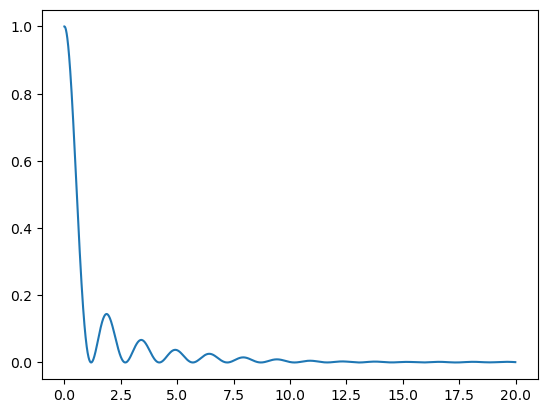

In [113]:
def loschmidt(E,t):
    return np.sum(np.exp(-1j*t*E))/len(E)
echo=[] 
for t in time:
    echo.append(loschmidt(eigenvalues,t))
echo=np.abs(np.array(echo,dtype=complex))**2
plt.plot(time,echo)

In [114]:
#Using analytics
c=np.sum(Energy)/L
def loschmidt(t):
    return np.exp(-1j*t*c)

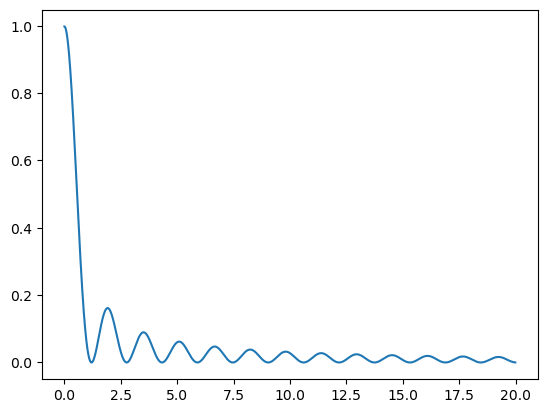

In [117]:
#Using analytics
c=np.sum(Energy)/L
def analytics(t):
    A=np.exp(-1j*t*c)
    s=0
    for k in range(1,L):
        s+=np.exp(-2j*t*np.cos(2*np.pi*k/L))
    return A*s/L
echo1=[]
echo2=[]
energy=
for t in time:
    echo1=analytics(t)
    echo2=loschmidt(Energy,t)

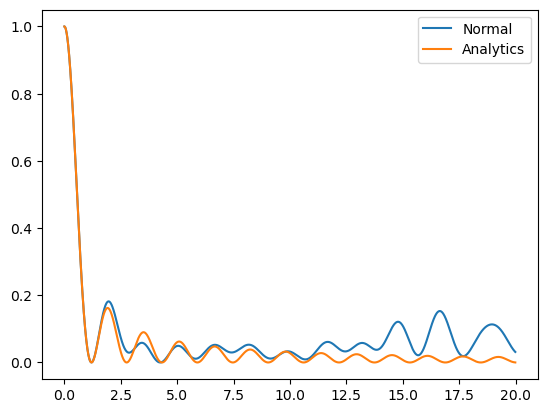

In [5]:
import numpy as np
import matplotlib.pyplot as plt
W=1
L=1000
Energy=np.random.uniform(low=-W/2, high=W/2, size=(L))
anderson_model=anderson(Energy)
time=np.arange(0,20,0.01)
#Use normal expression
echo1=anderson_model.echo(time)
#Use Analytics
def analytics(E,t):
    c=np.sum(E)/len(E)
    A=np.exp(-1j*t*c)
    k=np.arange(1,len(E)+1)
    s=np.sum(np.exp(-2j*t*np.cos(2*np.pi*k/len(E))))
    return A*s/len(E)
echo2=[]
for t in time:
    echo2.append(analytics(Energy,t))
echo2=np.abs(np.array(echo2,dtype=complex))**2
plt.plot(time,echo1,label='Normal')
plt.plot(time,echo2,label='Analytics')
plt.legend()

In [8]:
#Anderson Model
class anderson():
    def __init__(self,energy):
        self.energy=energy
        self.lattice_size=len(energy)
        self.H=self.hamiltonian(energy)
        self.Lambda,self.w=np.linalg.eigh(self.H)
    def hamiltonian(self,energy):
        I=np.ones(self.lattice_size-1)
        H=np.diagflat(I,1)+np.diagflat(I,-1)+np.diagflat(energy)
        H[self.lattice_size-1,0]=1
        H[0,self.lattice_size-1]=1
        return H
    def return_amplitude(self,t):
        eigenvalue_array=np.exp(-1j*self.Lambda*t,dtype=np.complex_)
        eigenstate_array=np.abs(self.w[0])**2
        u=eigenvalue_array@eigenstate_array
        return u
    def phi(self,amplitude):
        n=len(amplitude)
        phi=np.zeros(n,dtype=np.complex_)
        phi[0]=amplitude[0]
        for i in range(1,n):
            inverse=amplitude[:i][::-1]
            phi[i]=amplitude[i]-phi[:i]@inverse
        return phi
    def F_n(self,time_array):
        amplitude=[]
        for t in time_array:
            amplitude.append(self.return_amplitude(t))
        F=self.phi(amplitude)
        return np.abs(np.array(F))**2

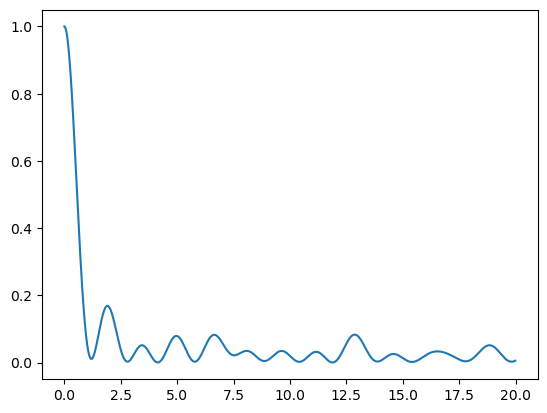

In [51]:
W=1
L=1000
Energy=np.random.uniform(low=-W/2, high=W/2, size=(L))
time=np.arange(0,20,0.01)
anderson_model=anderson(Energy)
echo=anderson_model.echo(time)
plt.plot(time,echo)

In [20]:
import numpy as np
def hamiltonian(energy):
    lattice_size=len(energy)
    I=np.ones(lattice_size-1)
    H=np.diagflat(I,1)+np.diagflat(I,-1)+np.diagflat(energy)
    H[lattice_size-1,0]=1
    H[0,lattice_size-1]=1
    return H
diagonal=np.linspace(-1,1,6)
np.random.shuffle(diagonal)
print(diagonal)

[-0.2  1.  -1.  -0.6  0.2  0.6]


In [38]:
for i in range(10):
    print(i)
    np.random.shuffle(diagonal)
    H=hamiltonian(diagonal)
    eig=np.linalg.eigh(H)[0]
    print(np.sum(eig))

0
8.881784197001252e-16
1
-4.440892098500626e-16
2
0.0
3
0.0
4
2.220446049250313e-15
5
-8.881784197001252e-16
6
8.881784197001252e-16
7
8.881784197001252e-16
8
1.7763568394002505e-15
9
-4.440892098500626e-16
